In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import time
import joblib
import warnings
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

warnings.filterwarnings('ignore')

In [58]:
data = pd.read_csv('/content/parkinsons_disease_data_cls.csv')
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,...,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,DoctorInCharge,WeeklyPhysicalActivity (hr),MedicalHistory,Symptoms,Diagnosis
0,3530,64,Female,Caucasian,NaN,31.243092,No,6.157042,4.331705,6.291197,...,25.542044,237.290807,4.161620,28.626480,5.355055,DrXXXConfid,04:14,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'No', 'Rigidity': 'No', 'Bradykines...",0
1,4848,79,Male,Asian,Higher,32.964518,No,5.192872,5.793078,8.603542,...,23.098051,150.130321,176.220403,20.310768,9.927998,DrXXXConfid,00:59,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'No', 'Rigidity': 'No', 'Bradykines...",0
2,4289,85,Male,Other,NaN,16.092385,No,9.920555,5.442308,8.894049,...,66.076197,66.871417,133.280607,20.614060,5.704308,DrXXXConfid,05:38,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'Yes', 'Rigidity': 'No', 'Bradykine...",1
3,4751,84,Female,Caucasian,High School,39.145792,Yes,18.875195,8.407833,8.300877,...,41.725854,248.163486,155.952027,4.237696,7.250435,DrXXXConfid,05:02,"{'FamilyHistoryParkinsons': 'Yes', 'TraumaticB...","{'Tremor': 'No', 'Rigidity': 'Yes', 'Bradykine...",1
4,4242,59,Male,African American,NaN,15.987603,Yes,2.854129,5.797936,7.714292,...,23.251949,127.747693,49.523001,21.475758,6.119130,DrXXXConfid,00:08,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'No', 'Rigidity': 'No', 'Bradykines...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,3122,78,Female,Caucasian,Bachelor's,25.016558,No,19.291626,1.233908,7.106251,...,95.277728,349.485249,56.184520,27.681205,1.805925,DrXXXConfid,02:32,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'Yes', 'Rigidity': 'No', 'Bradykine...",1
2021,4053,76,Male,Caucasian,Bachelor's,24.473117,No,17.408649,2.061830,7.800459,...,78.875326,269.910802,139.085879,15.345110,1.221937,DrXXXConfid,07:59,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'No', 'Rigidity': 'Yes', 'Bradykine...",1
2022,3597,84,Female,Caucasian,Bachelor's,28.603174,Yes,0.315748,5.017171,5.682178,...,72.885415,132.461697,52.085094,27.725956,4.138923,DrXXXConfid,02:59,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'Yes', 'Rigidity': 'No', 'Bradykine...",1
2023,4148,81,Female,African American,High School,38.444263,No,4.785673,1.255720,7.471117,...,85.289318,106.699594,63.481742,23.982956,6.370104,DrXXXConfid,09:49,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'Yes', 'Rigidity': 'No', 'Bradykine...",1


In [59]:
# data, test = train_test_split(
#     data,
#     test_size=0.1,                # 10% for testing
#     random_state=42,              # For reproducibility
#     stratify=data['Diagnosis']   # Only for classification tasks
# )

# data.to_csv('train_90percent_Classification.csv', index=False)
# test.to_csv('test_10Percent_Classification.csv', index=False)

In [60]:
# data=pd.read_csv('/content/train_90percent_Classification.csv')
# data

In [61]:
data.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,374
BMI,0
Smoking,0
AlcoholConsumption,0
DietQuality,0
SleepQuality,0


In [62]:
null_edu=(data.isnull().sum()/2025)*100
null_edu



,0
PatientID,0.000000
Age,0.000000
Gender,0.000000
Ethnicity,0.000000
EducationLevel,18.469136
BMI,0.000000
Smoking,0.000000
AlcoholConsumption,0.000000
DietQuality,0.000000
SleepQuality,0.000000


<Axes: >

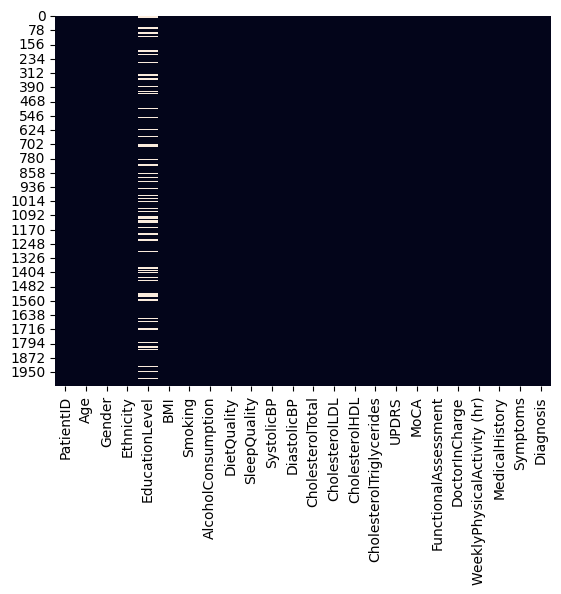

In [63]:

sns.heatmap(data.isnull(), cbar=False)

In [64]:
data['EducationLevel']=data['EducationLevel'].fillna(data['EducationLevel'].mode()[0])

In [65]:
data.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
DietQuality,0
SleepQuality,0


In [66]:
data.describe()

,PatientID,Age,BMI,AlcoholConsumption,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Diagnosis
count,2025.00000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
mean,4112.98716,69.652346,27.162397,10.063892,4.896189,7.002411,133.815309,90.197037,226.805594,126.179968,59.613945,222.814905,101.519190,15.027270,4.990583,0.624198
std,608.71494,11.571040,7.222145,5.694348,2.874157,1.751285,26.586488,17.037746,43.717872,43.455005,23.464930,101.819477,56.513180,8.613916,2.935980,0.484449
min,3058.00000,50.000000,15.008333,0.002228,0.000011,4.000497,90.000000,60.000000,150.062698,50.130454,20.027981,50.113604,0.028441,0.021191,0.001505,0.000000
25%,3587.00000,60.000000,20.757513,5.160093,2.446423,5.501449,110.000000,75.000000,189.048799,88.815994,39.399494,132.520174,53.390605,7.469156,2.399154,0.000000
50%,4112.00000,70.000000,27.119731,10.109640,4.788005,6.930472,133.000000,91.000000,228.464785,126.938405,59.182378,222.634972,102.715326,14.849281,4.976213,1.000000
75%,4639.00000,80.000000,33.394469,14.858553,7.340610,8.560994,157.000000,105.000000,264.774192,164.103480,79.473546,311.541704,149.831682,22.530314,7.495758,1.000000
max,5162.00000,89.000000,39.999887,19.988866,9.995864,9.999821,179.000000,119.000000,299.963074,199.985981,99.982265,399.975022,198.953604,29.970107,9.992697,1.000000


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PatientID                    2025 non-null   int64  
 1   Age                          2025 non-null   int64  
 2   Gender                       2025 non-null   object 
 3   Ethnicity                    2025 non-null   object 
 4   EducationLevel               2025 non-null   object 
 5   BMI                          2025 non-null   float64
 6   Smoking                      2025 non-null   object 
 7   AlcoholConsumption           2025 non-null   float64
 8   DietQuality                  2025 non-null   float64
 9   SleepQuality                 2025 non-null   float64
 10  SystolicBP                   2025 non-null   int64  
 11  DiastolicBP                  2025 non-null   int64  
 12  CholesterolTotal             2025 non-null   float64
 13  CholesterolLDL    

In [68]:
data.duplicated().sum()

np.int64(0)

In [69]:
for col in data.columns:

        print(f"\nColumn: {col}")



Column: PatientID

Column: Age

Column: Gender

Column: Ethnicity

Column: EducationLevel

Column: BMI

Column: Smoking

Column: AlcoholConsumption

Column: DietQuality

Column: SleepQuality

Column: SystolicBP

Column: DiastolicBP

Column: CholesterolTotal

Column: CholesterolLDL

Column: CholesterolHDL

Column: CholesterolTriglycerides

Column: UPDRS

Column: MoCA

Column: FunctionalAssessment

Column: DoctorInCharge

Column: WeeklyPhysicalActivity (hr)

Column: MedicalHistory

Column: Symptoms

Column: Diagnosis


In [70]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"\nColumn: {col}")
        print(f"Number of unique values: {data[col].nunique()}")
        print(f"Unique values: {data[col].unique()}")


Column: Gender
Number of unique values: 2
Unique values: ['Female' 'Male']

Column: Ethnicity
Number of unique values: 4
Unique values: ['Caucasian' 'Asian' 'Other' 'African American']

Column: EducationLevel
Number of unique values: 3
Unique values: ['High School' 'Higher' "Bachelor's"]

Column: Smoking
Number of unique values: 2
Unique values: ['No' 'Yes']

Column: DoctorInCharge
Number of unique values: 1
Unique values: ['DrXXXConfid']

Column: WeeklyPhysicalActivity (hr)
Number of unique values: 586
Unique values: ['04:14' '00:59' '05:38' '05:02' '00:08' '01:53' '02:10' '00:18' '08:48'
 '06:29' '03:38' '08:28' '07:50' '00:25' '09:24' '07:34' '04:24' '07:60'
 '01:19' '09:53' '01:25' '06:17' '07:07' '05:22' '09:47' '09:32' '02:16'
 '01:38' '02:01' '00:19' '08:04' '07:13' '03:28' '08:01' '07:25' '05:39'
 '00:16' '04:58' '07:46' '03:47' '03:17' '04:59' '02:18' '08:30' '02:25'
 '01:10' '05:19' '03:34' '04:33' '05:50' '03:11' '02:03' '09:43' '08:05'
 '03:19' '05:21' '01:05' '04:44' '00:

In [71]:
data['MedicalHistory'] = data['MedicalHistory'].apply(ast.literal_eval)
data['Symptoms'] = data['Symptoms'].apply(ast.literal_eval)

medical_df = data['MedicalHistory'].apply(pd.Series)
symptoms_df = data['Symptoms'].apply(pd.Series)

data.drop(['MedicalHistory', 'Symptoms'], axis=1, inplace=True)

data = pd.concat([data, medical_df, symptoms_df], axis=1)
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,...,Diabetes,Depression,Stroke,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,3530,64,Female,Caucasian,High School,31.243092,No,6.157042,4.331705,6.291197,...,No,No,No,No,No,No,No,Yes,No,No
1,4848,79,Male,Asian,Higher,32.964518,No,5.192872,5.793078,8.603542,...,No,Yes,No,No,No,No,No,No,No,No
2,4289,85,Male,Other,High School,16.092385,No,9.920555,5.442308,8.894049,...,No,No,No,Yes,No,No,No,No,No,Yes
3,4751,84,Female,Caucasian,High School,39.145792,Yes,18.875195,8.407833,8.300877,...,No,No,No,No,Yes,No,No,No,No,No
4,4242,59,Male,African American,High School,15.987603,Yes,2.854129,5.797936,7.714292,...,Yes,No,No,No,No,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,3122,78,Female,Caucasian,Bachelor's,25.016558,No,19.291626,1.233908,7.106251,...,Yes,Yes,No,Yes,No,No,No,No,No,Yes
2021,4053,76,Male,Caucasian,Bachelor's,24.473117,No,17.408649,2.061830,7.800459,...,No,No,No,No,Yes,Yes,No,No,No,Yes
2022,3597,84,Female,Caucasian,Bachelor's,28.603174,Yes,0.315748,5.017171,5.682178,...,No,No,No,Yes,No,No,No,No,No,No
2023,4148,81,Female,African American,High School,38.444263,No,4.785673,1.255720,7.471117,...,No,No,No,Yes,No,No,No,No,No,No


In [72]:
for col in data.columns:

        print(f"\nColumn: {col}")
        print(f"Number of unique values: {data[col].nunique()}")
        print(f"Unique values: {data[col].unique()}")


Column: PatientID
Number of unique values: 2025
Unique values: [3530 4848 4289 ... 3597 4148 3070]

Column: Age
Number of unique values: 40
Unique values: [64 79 85 84 59 69 54 72 60 81 87 83 52 86 74 75 70 55 71 76 50 66 58 57
 65 53 68 80 89 88 63 61 51 56 73 78 67 82 62 77]

Column: Gender
Number of unique values: 2
Unique values: ['Female' 'Male']

Column: Ethnicity
Number of unique values: 4
Unique values: ['Caucasian' 'Asian' 'Other' 'African American']

Column: EducationLevel
Number of unique values: 3
Unique values: ['High School' 'Higher' "Bachelor's"]

Column: BMI
Number of unique values: 2025
Unique values: [31.24309187 32.96451756 16.09238541 ... 28.60317433 38.44426279
 30.22551208]

Column: Smoking
Number of unique values: 2
Unique values: ['No' 'Yes']

Column: AlcoholConsumption
Number of unique values: 2025
Unique values: [6.15704247 5.19287191 9.92055524 ... 0.31574848 4.78567284 3.76291807]

Column: DietQuality
Number of unique values: 2025
Unique values: [4.33170515

In [73]:
yes_no_columns = [
    'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Smoking',
    'Hypertension', 'Diabetes', 'Depression', 'Stroke',
    'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
    'SpeechProblems', 'SleepDisorders', 'Constipation'
]

data[yes_no_columns] = data[yes_no_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

In [74]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [75]:
education_map = {
    'High School': 0,
    "Bachelor's": 1,
    'Higher': 2
}
data['EducationLevel'] = data['EducationLevel'].map(education_map)

In [76]:
ethnicity_map = {
    'Caucasian': 0,
    'Asian': 1,
    'African American': 2,
    'Other': 3
}
data['Ethnicity'] = data['Ethnicity'].map(ethnicity_map)

In [77]:
data['DoctorInCharge'] = 1

In [78]:
def convert_time_to_hours(time_str):
    try:
        h, m = map(int, time_str.split(':'))
        return h + m / 60
    except:
        return np.nan

data['WeeklyPhysicalActivity (hr)'] = data['WeeklyPhysicalActivity (hr)'].apply(convert_time_to_hours)
data['WeeklyPhysicalActivity (hr)']

,WeeklyPhysicalActivity (hr)
0,4.233333
1,0.983333
2,5.633333
3,5.033333
4,0.133333
...,...
2020,2.533333
2021,7.983333
2022,2.983333
2023,9.816667


In [79]:
data.isna().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
DietQuality,0
SleepQuality,0


In [80]:
data = data.astype(int)
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,...,Diabetes,Depression,Stroke,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,3530,64,0,0,0,31,0,6,4,6,...,0,0,0,0,0,0,0,1,0,0
1,4848,79,1,1,2,32,0,5,5,8,...,0,1,0,0,0,0,0,0,0,0
2,4289,85,1,3,0,16,0,9,5,8,...,0,0,0,1,0,0,0,0,0,1
3,4751,84,0,0,0,39,1,18,8,8,...,0,0,0,0,1,0,0,0,0,0
4,4242,59,1,2,0,15,1,2,5,7,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,3122,78,0,0,1,25,0,19,1,7,...,1,1,0,1,0,0,0,0,0,1
2021,4053,76,1,0,1,24,0,17,2,7,...,0,0,0,0,1,1,0,0,0,1
2022,3597,84,0,0,1,28,1,0,5,5,...,0,0,0,1,0,0,0,0,0,0
2023,4148,81,0,2,0,38,0,4,1,7,...,0,0,0,1,0,0,0,0,0,0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   PatientID                    2025 non-null   int64
 1   Age                          2025 non-null   int64
 2   Gender                       2025 non-null   int64
 3   Ethnicity                    2025 non-null   int64
 4   EducationLevel               2025 non-null   int64
 5   BMI                          2025 non-null   int64
 6   Smoking                      2025 non-null   int64
 7   AlcoholConsumption           2025 non-null   int64
 8   DietQuality                  2025 non-null   int64
 9   SleepQuality                 2025 non-null   int64
 10  SystolicBP                   2025 non-null   int64
 11  DiastolicBP                  2025 non-null   int64
 12  CholesterolTotal             2025 non-null   int64
 13  CholesterolLDL               2025 non-null   int

In [82]:
data['Diagnosis'].unique()

array([0, 1])

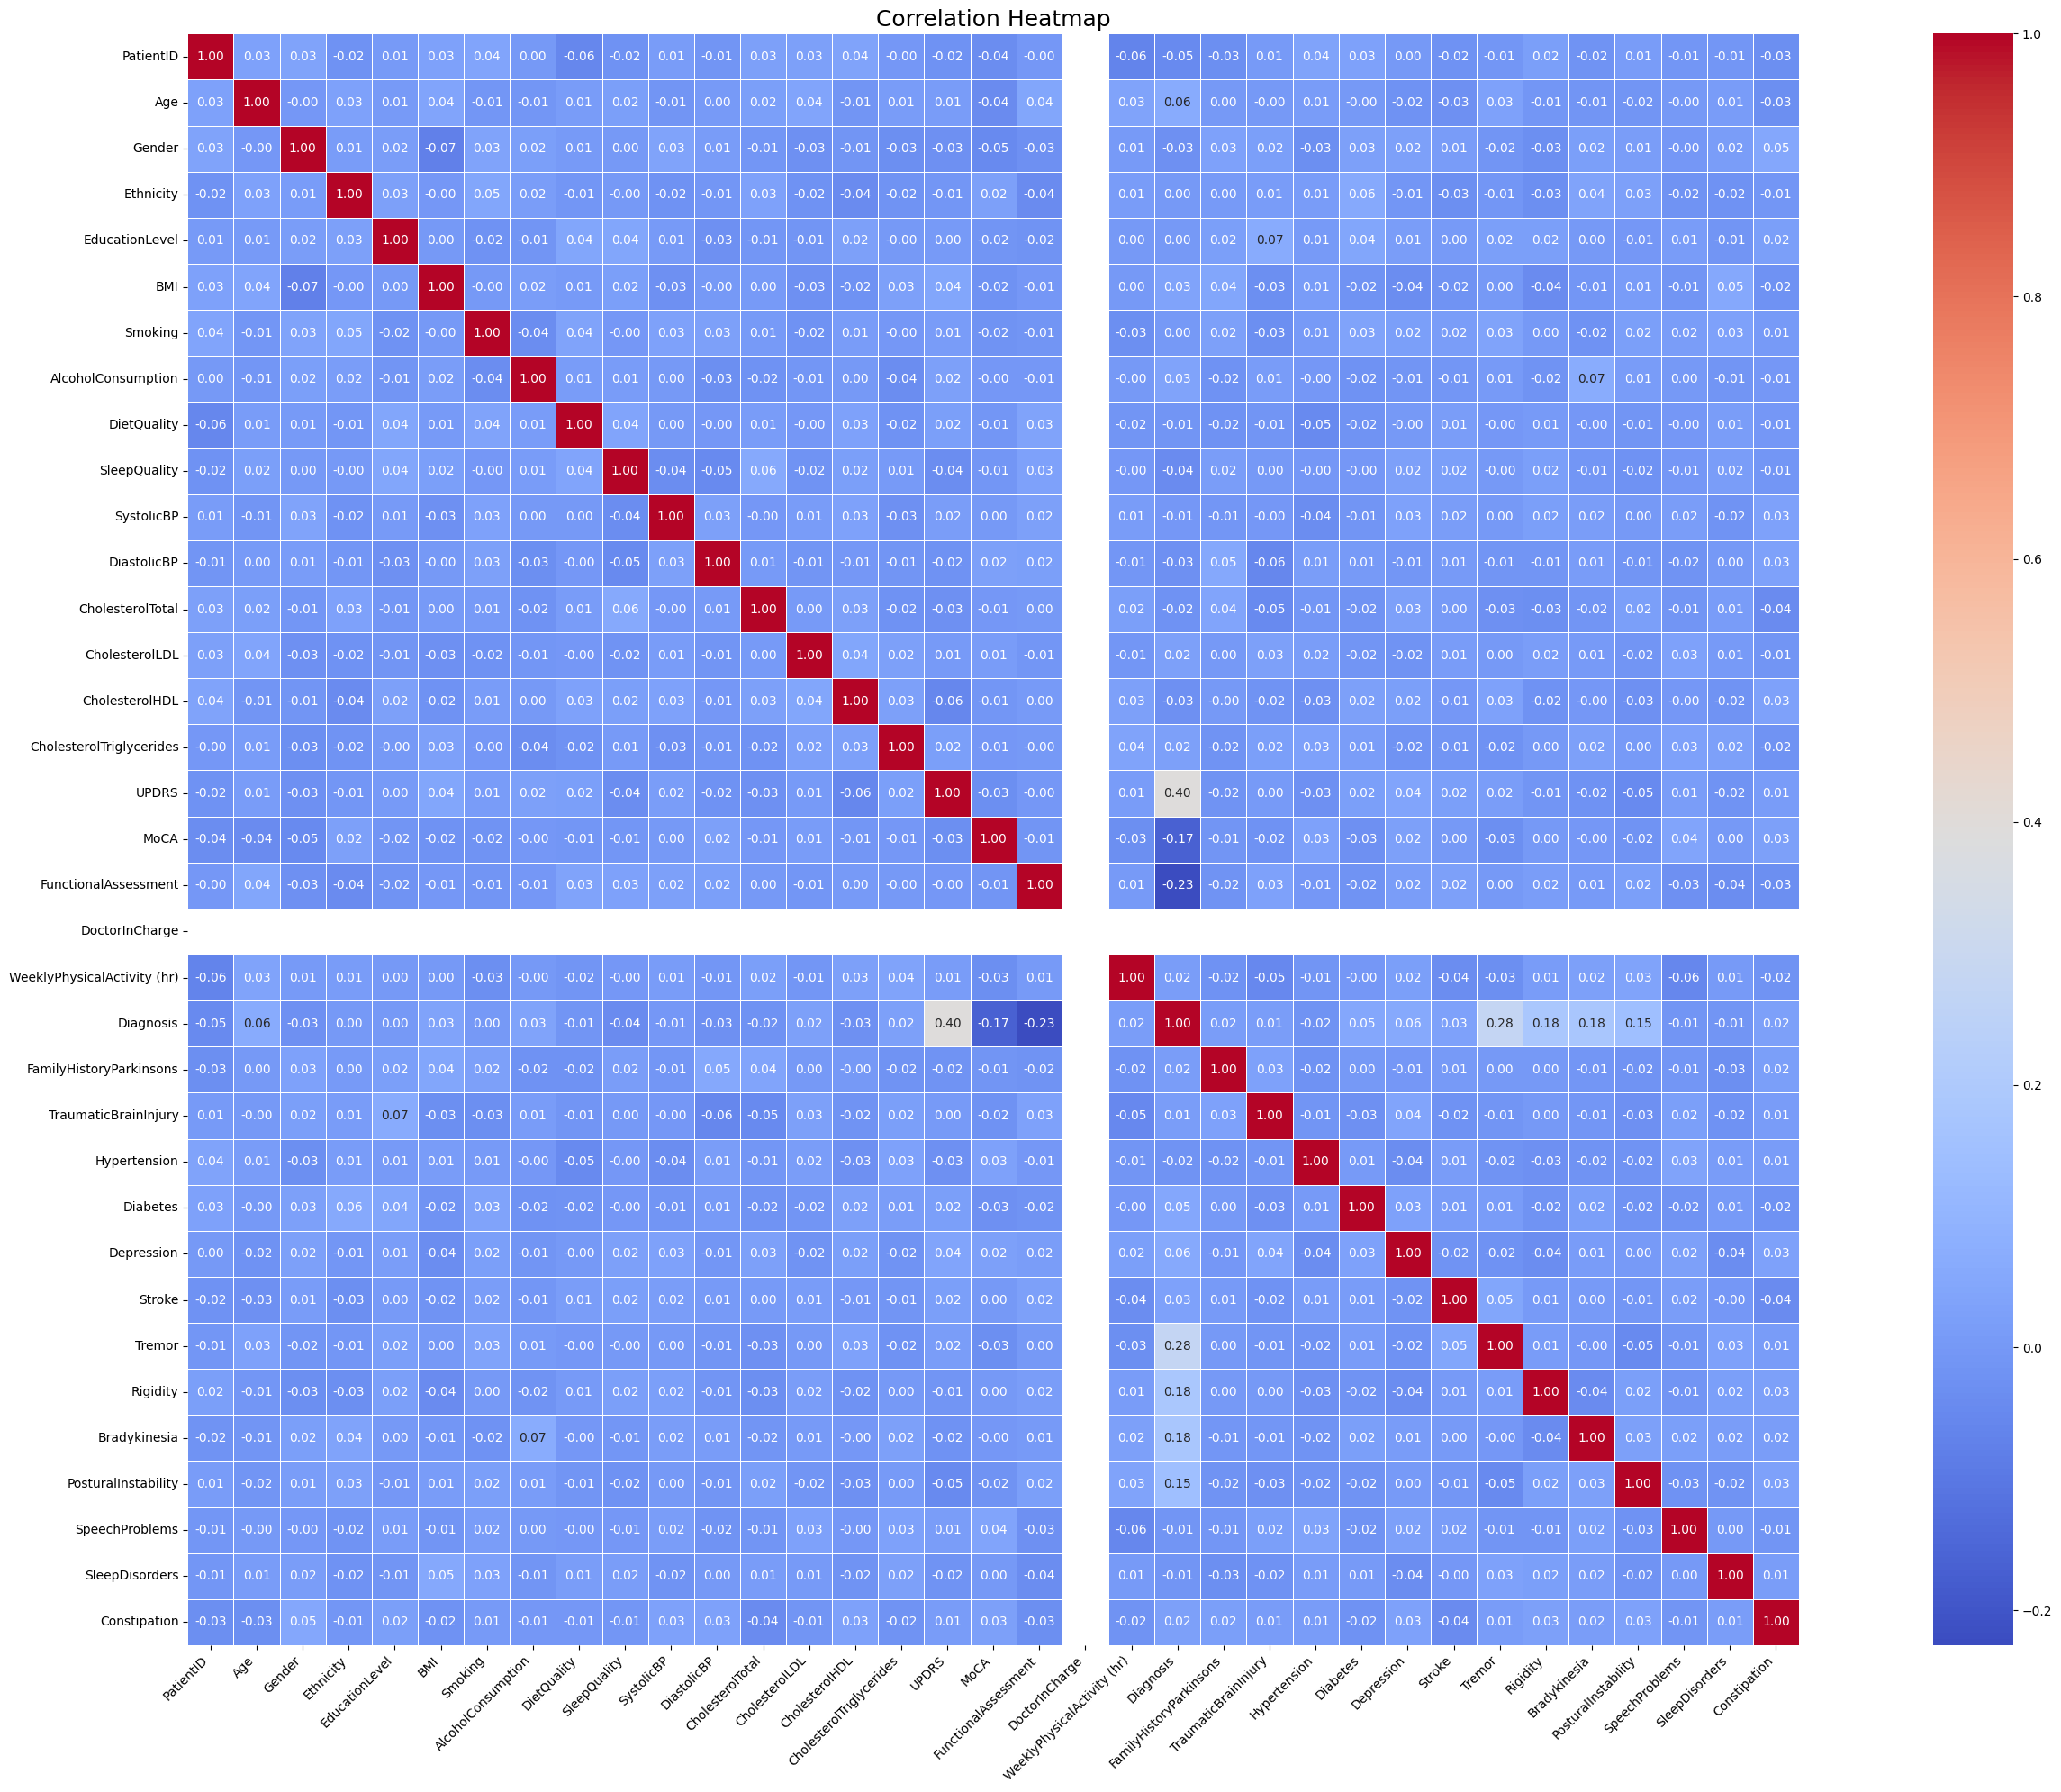

In [83]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(30, 20))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5,
    annot_kws={"size": 10}
)


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Correlation Heatmap", fontsize=18)
plt.tight_layout()
plt.show()

In [84]:
data.shape

(2025, 35)

In [85]:
target_corr = corr_matrix['Diagnosis'].sort_values(ascending=False)
target_corr

,Diagnosis
Diagnosis,1.000000
UPDRS,0.396247
Tremor,0.279135
Rigidity,0.183833
Bradykinesia,0.179565
PosturalInstability,0.146575
Age,0.064733
Depression,0.057990
Diabetes,0.050068
AlcoholConsumption,0.033746


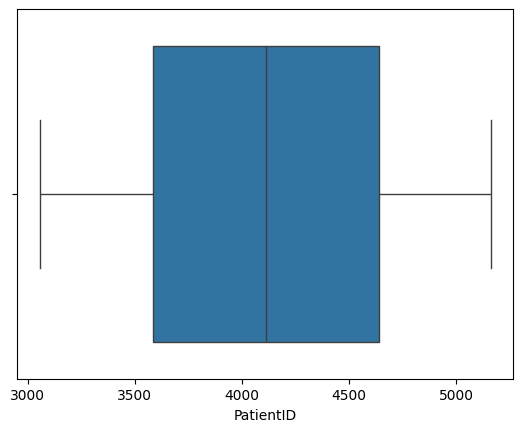

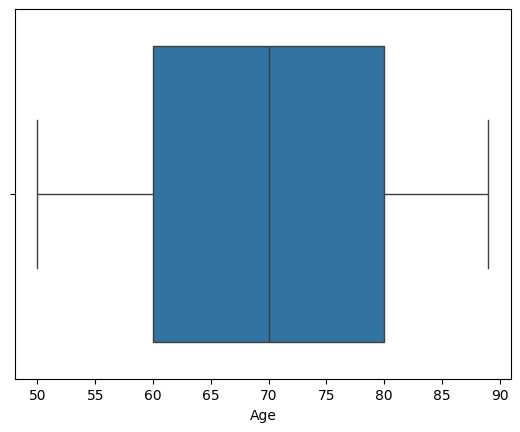

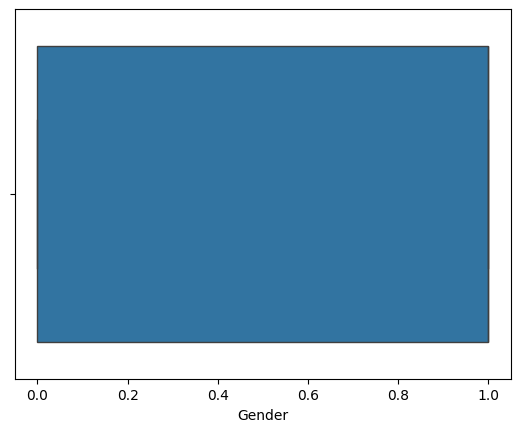

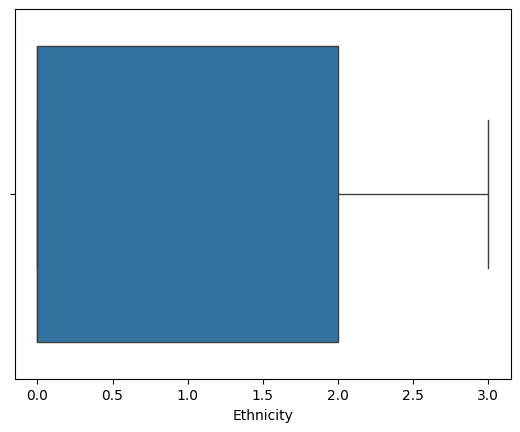

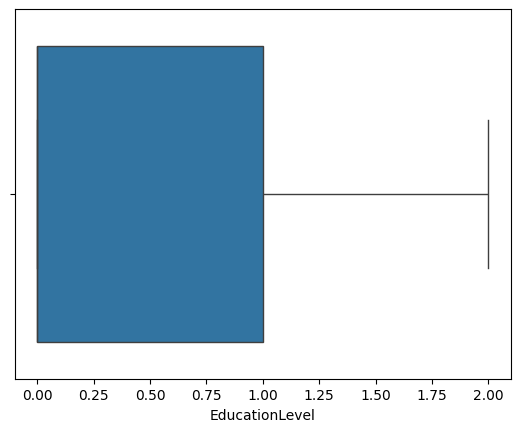

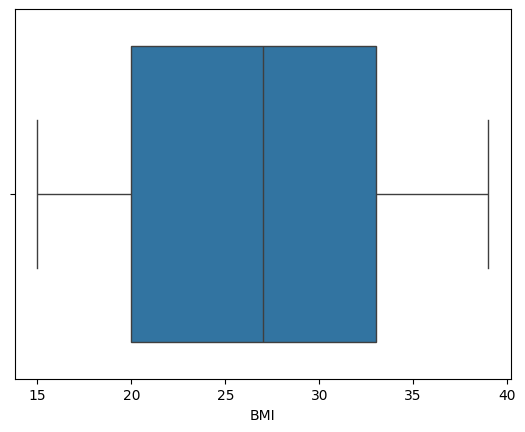

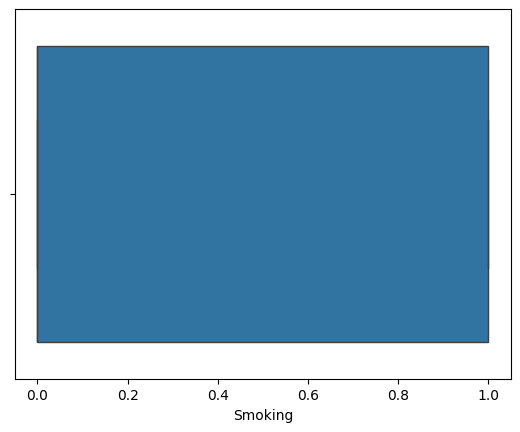

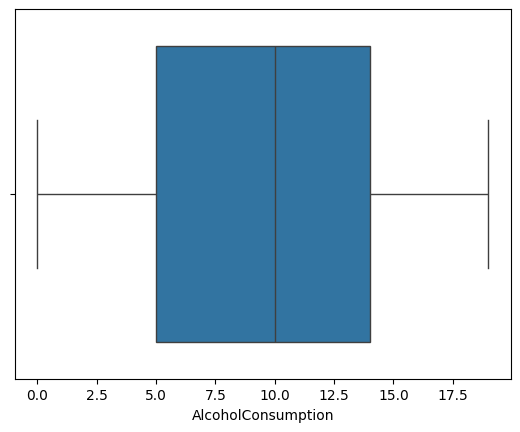

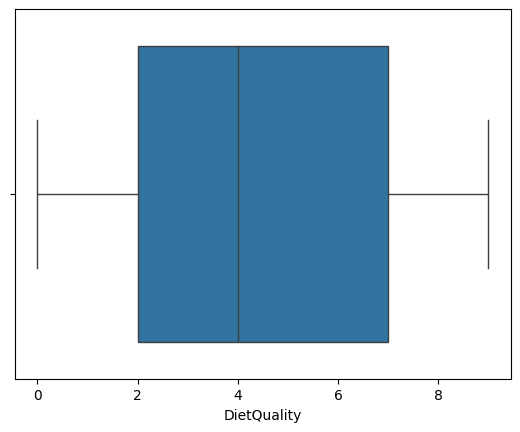

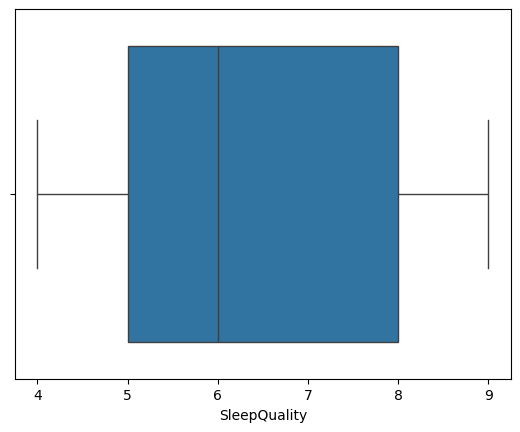

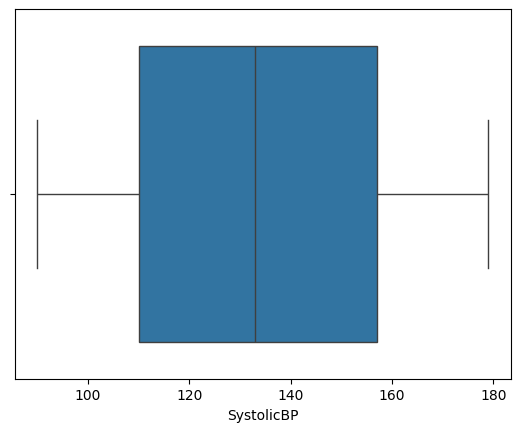

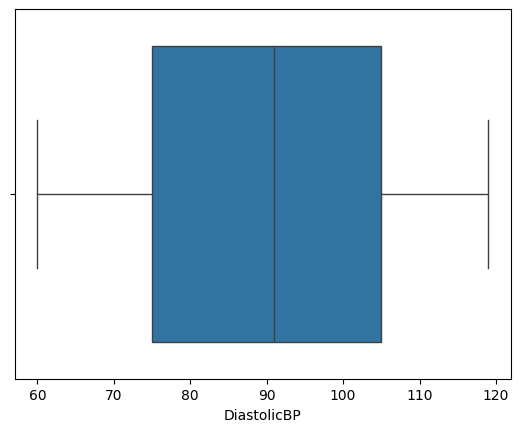

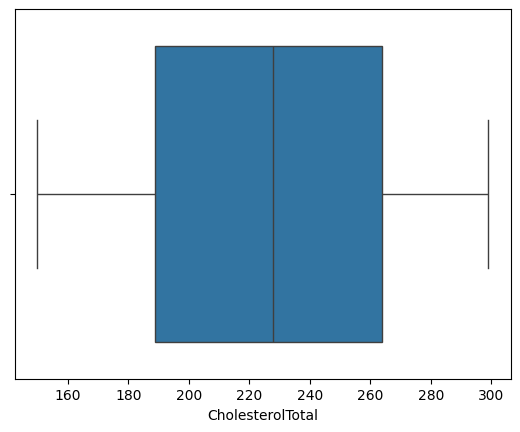

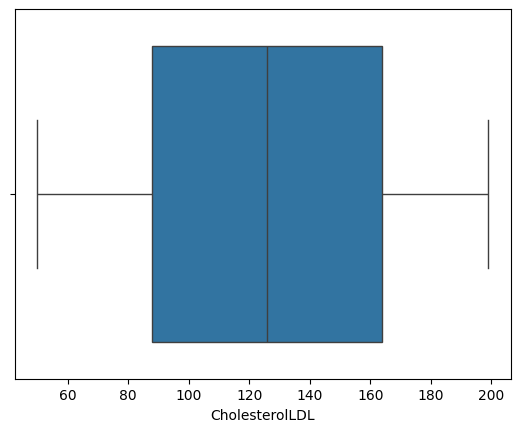

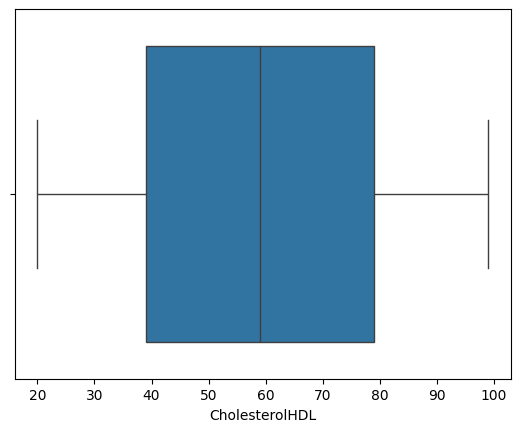

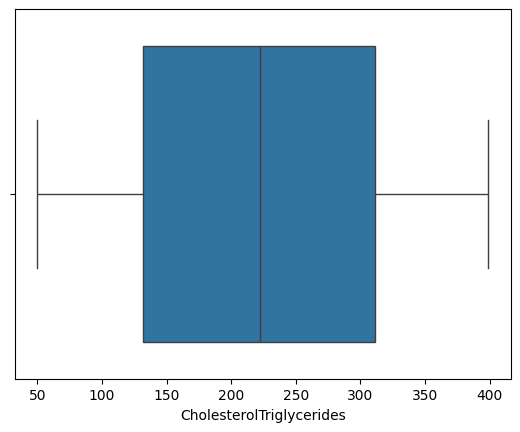

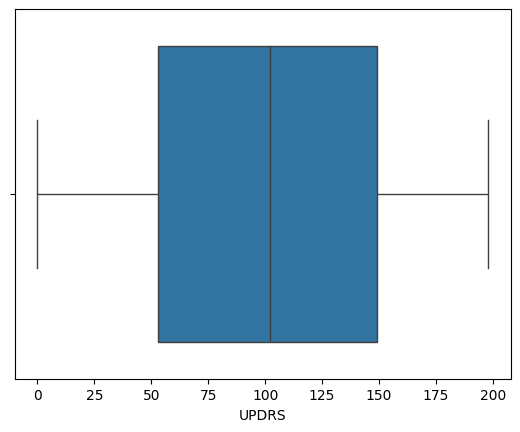

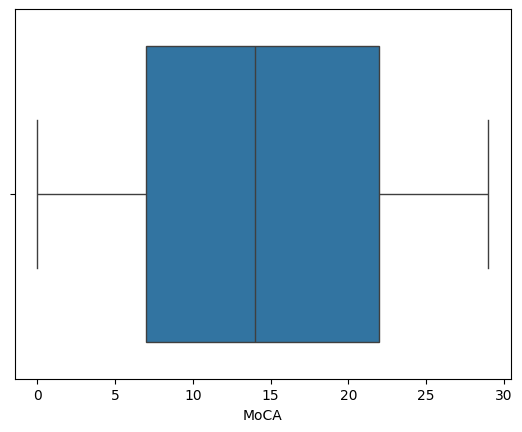

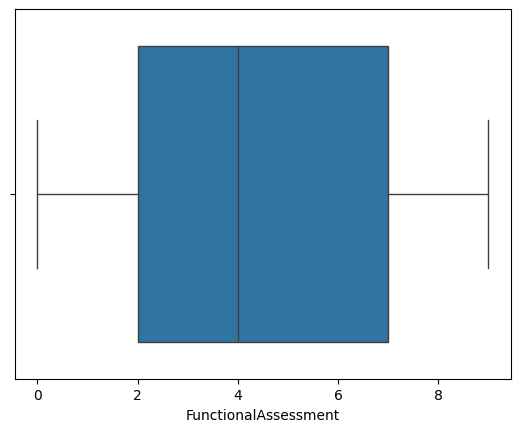

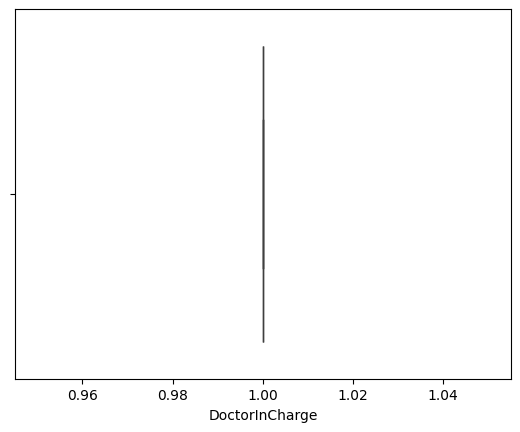

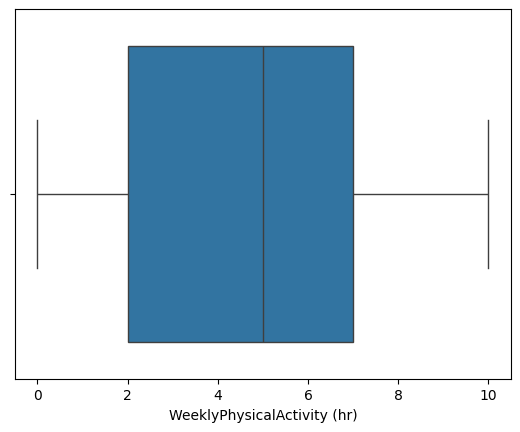

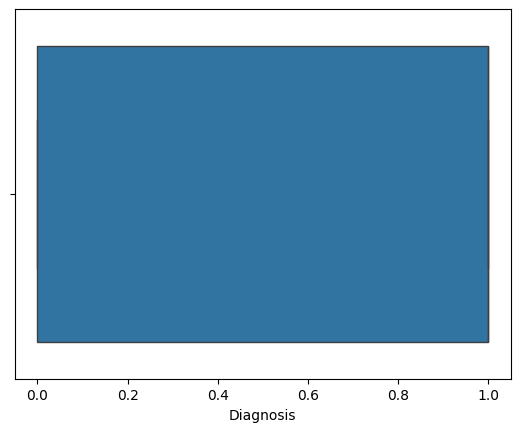

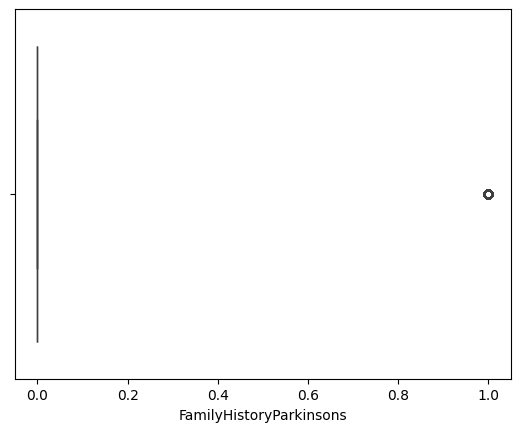

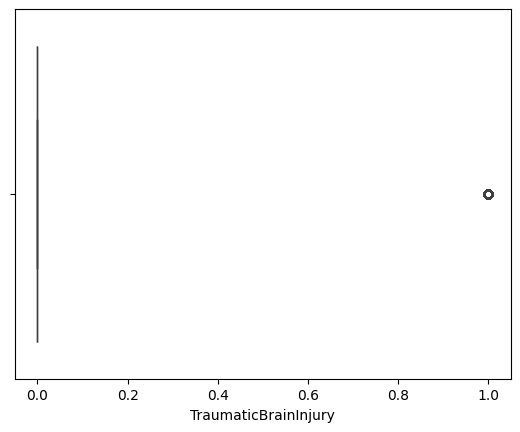

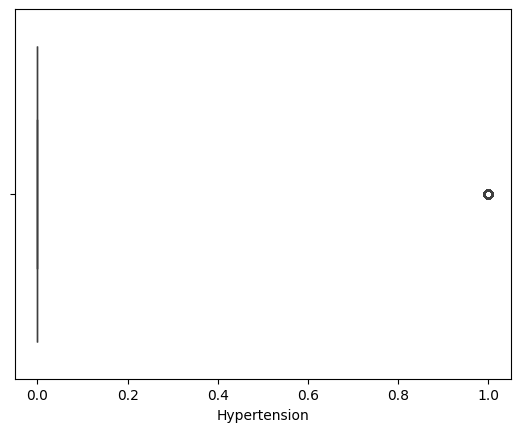

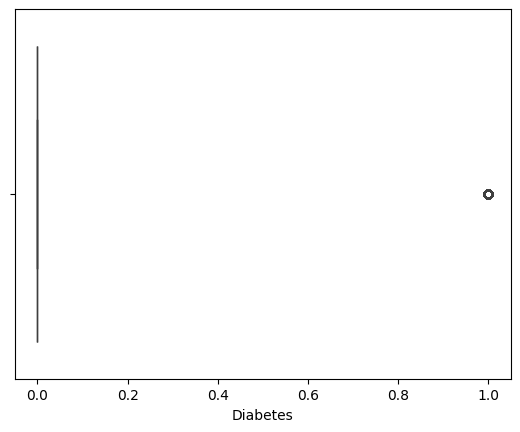

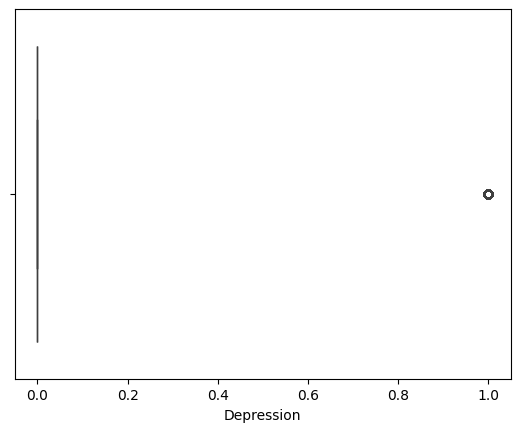

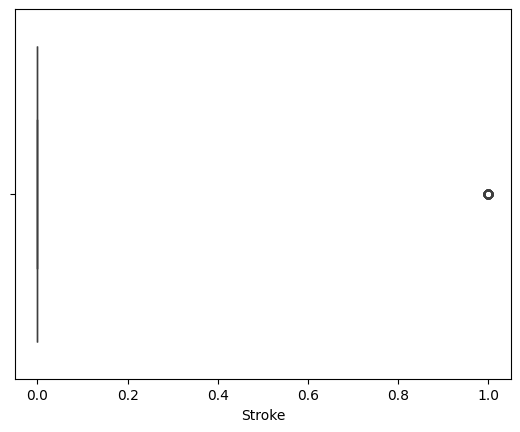

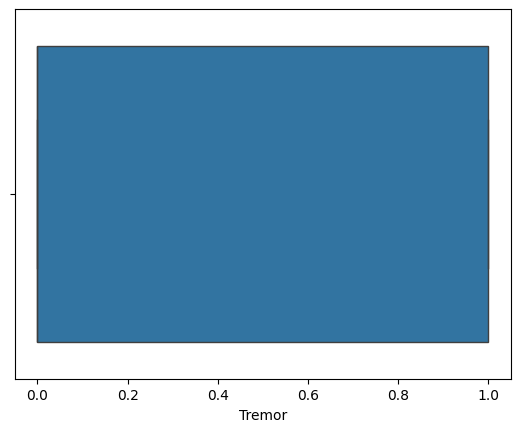

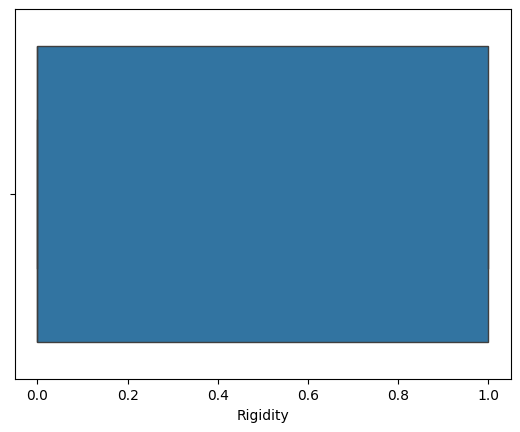

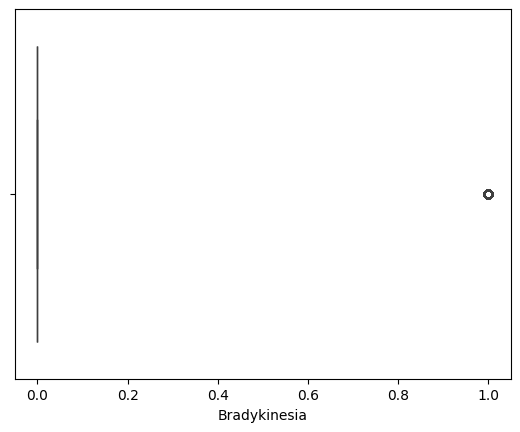

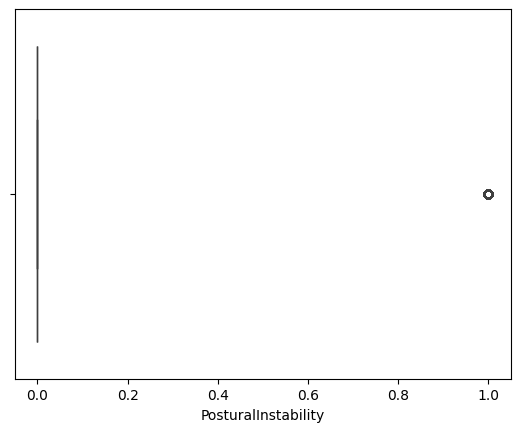

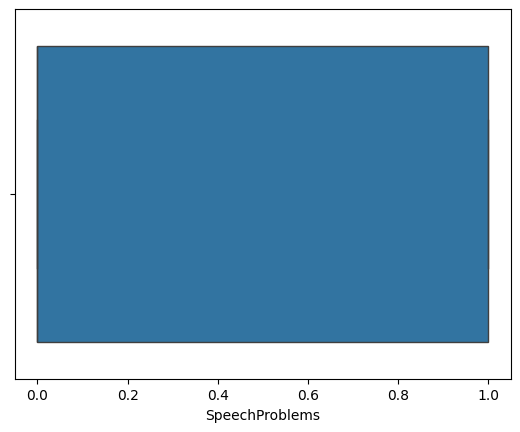

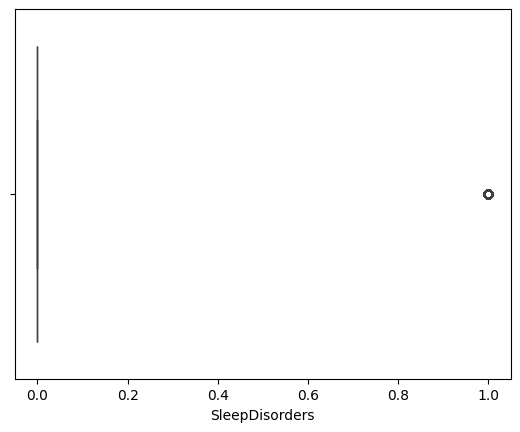

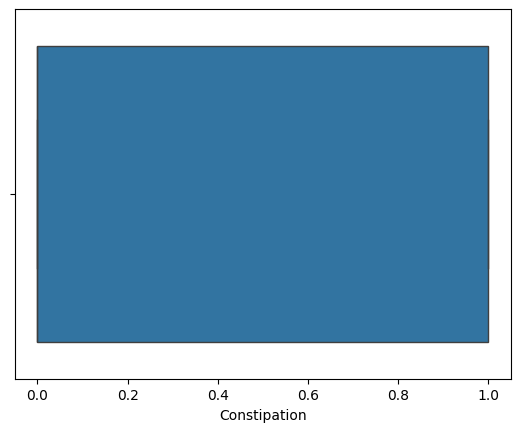

In [86]:
columns=data.columns
columns

# box plot to check outliers
for col in columns:
    if not (data[col].dtype == 'object'):
        sns.boxplot(x=data[col])
        plt.show()

In [87]:
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts().sort_index())


Column: PatientID
PatientID
3058    1
3059    1
3060    1
3061    1
3062    1
       ..
5158    1
5159    1
5160    1
5161    1
5162    1
Name: count, Length: 2025, dtype: int64

Column: Age
Age
50    51
51    57
52    50
53    54
54    61
55    37
56    52
57    46
58    48
59    46
60    47
61    39
62    45
63    47
64    49
65    56
66    53
67    51
68    41
69    51
70    54
71    66
72    43
73    63
74    45
75    64
76    55
77    46
78    53
79    44
80    50
81    53
82    43
83    47
84    64
85    47
86    56
87    49
88    53
89    49
Name: count, dtype: int64

Column: Gender
Gender
0     995
1    1030
Name: count, dtype: int64

Column: Ethnicity
Ethnicity
0    1222
1     193
2     405
3     205
Name: count, dtype: int64

Column: EducationLevel
EducationLevel
0    1179
1     632
2     214
Name: count, dtype: int64

Column: BMI
BMI
15     95
16     74
17     78
18     91
19    115
20     79
21     77
22     97
23     81
24     71
25     68
26     75
27     78
28     77
29

In [88]:
target_corr = corr_matrix['Diagnosis'].sort_values(ascending=False)
target_corr.drop(['Diagnosis','PatientID'], inplace=True)
Xabs = abs(target_corr)
targetcolumns = []

In [89]:
for i in range(len(Xabs)):
    if Xabs[i] >= 0.03:
        targetcolumns.append(Xabs.index[i])

print(len(targetcolumns))

14


In [90]:
for col in targetcolumns:
    print(col)

UPDRS
Tremor
Rigidity
Bradykinesia
PosturalInstability
Age
Depression
Diabetes
AlcoholConsumption
BMI
Stroke
SleepQuality
MoCA
FunctionalAssessment


In [91]:
y=data['Diagnosis']
x=data.drop(['Diagnosis'],axis=1)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(data[targetcolumns], y, test_size=0.2, random_state=42)

In [93]:
X_test.columns

Index(['UPDRS', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'Age', 'Depression', 'Diabetes', 'AlcoholConsumption', 'BMI', 'Stroke',
       'SleepQuality', 'MoCA', 'FunctionalAssessment'],
      dtype='object')

In [94]:
print(X_train.columns)

Index(['UPDRS', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'Age', 'Depression', 'Diabetes', 'AlcoholConsumption', 'BMI', 'Stroke',
       'SleepQuality', 'MoCA', 'FunctionalAssessment'],
      dtype='object')


In [95]:
# from sklearn.feature_selection import mutual_info_classif
# # Compute mutual information scores (using DataFrame columns)
# mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
# mi_series = pd.Series(mi_scores, index=X_train.columns)
# selected_features = mi_series.nlargest(10).index.tolist()  # Select top needed features

# # Keep only selected features (still DataFrames)
# X_train = X_train[selected_features]
# X_test = X_test[selected_features]

#RFE Wrapper Feature Extraction

In [96]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Rewrap X_train and X_test into DataFrames with proper column names
X_train_df = pd.DataFrame(X_train, columns=targetcolumns)  # Replace with your column list
X_test_df = pd.DataFrame(X_test, columns=targetcolumns)

# Use RandomForest as the base estimator for RFE
estimator = RandomForestClassifier(random_state=42)
selector = RFE(estimator=estimator, n_features_to_select=15, step=1)
selector.fit(X_train_df, y_train)

# Get the selected top 15 feature names
selected_features = X_train_df.columns[selector.support_].tolist()
print("Selected Features:", selected_features)

# Keep only selected features
X_train = X_train_df[selected_features]
X_test = X_test_df[selected_features]


Selected Features: ['UPDRS', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'Age', 'Depression', 'Diabetes', 'AlcoholConsumption', 'BMI', 'Stroke', 'SleepQuality', 'MoCA', 'FunctionalAssessment']


In [97]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'C': [0.1, 1, 10]
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7]
    }),
    "Naive Bayes": (GaussianNB(), {}),
    "Decision Tree": (DecisionTreeClassifier(), {
        'max_depth': [3, 5, 10, None]
    }),
    "Random Forest": (RandomForestClassifier(), {
        'n_estimators': [50, 100,150],
        'max_depth': [5, 10, None]
    }),


    "SVM": (SVC(), {
        'C': [0.1, 1, 10,100],
        'kernel': ['linear', 'rbf','poly']
    })

}


In [99]:
accuracy = []
train_time = []
test_time = []
model_name = []
mse = []
r2 = []

for name, (model, params) in models.items():

    train_start = time.time()

    if params:
        grid = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print(f"Best Parameters for {name}: {grid.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_model = model

    train_end = time.time()
    train_time_ = train_end - train_start

    test_start = time.time()
    test_preds = best_model.predict(X_test)
    test_end = time.time()
    test_time_ = test_end - test_start

    test_acc = accuracy_score(y_test, test_preds)

    mse_ = mean_squared_error(y_test, test_preds)
    r2_ = r2_score(y_test, test_preds)

    accuracy.append(test_acc)
    train_time.append(train_time_)
    test_time.append(test_time_)
    model_name.append(name)
    mse.append(mse_)
    r2.append(r2_)

    print(f"Test Accuracy: {test_acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, test_preds))
    print(f"MSE: {mse_:.4f}")
    print(f"R² Score: {r2_:.4f}\n")


Best Parameters for Logistic Regression: {'C': 1}
Test Accuracy: 0.8321
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       169
           1       0.84      0.88      0.86       236

    accuracy                           0.83       405
   macro avg       0.83      0.82      0.83       405
weighted avg       0.83      0.83      0.83       405

MSE: 0.1679
R² Score: 0.3095

Best Parameters for KNN: {'n_neighbors': 7}
Test Accuracy: 0.7926
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       169
           1       0.78      0.89      0.83       236

    accuracy                           0.79       405
   macro avg       0.80      0.77      0.78       405
weighted avg       0.79      0.79      0.79       405

MSE: 0.2074
R² Score: 0.1470

Test Accuracy: 0.7778
Classification Report:
              precision    recall  f1-score   support

  

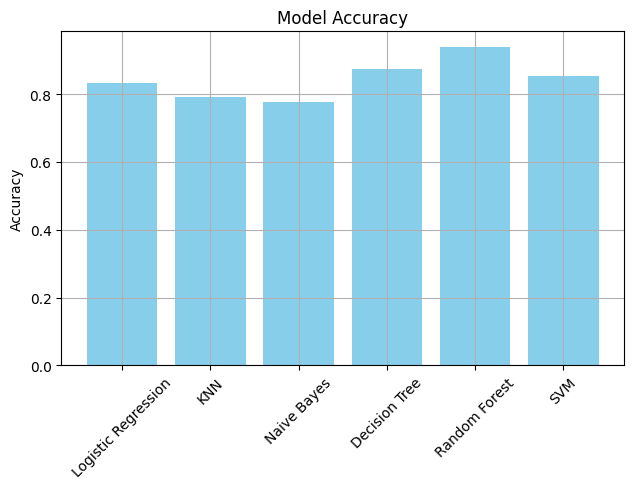

In [100]:
x = range(len(model_name))
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.bar(x, accuracy, color='skyblue')
plt.xticks(x, model_name, rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

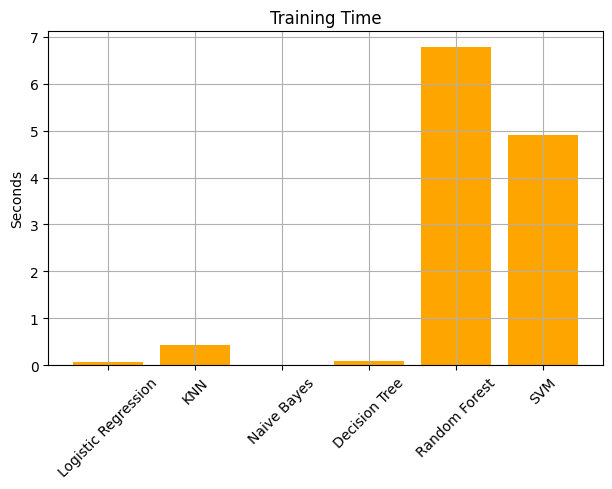

In [101]:
x = range(len(model_name))
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 2)
plt.bar(x, train_time, color='orange')
plt.xticks(x, model_name, rotation=45)
plt.ylabel("Seconds")
plt.title("Training Time")
plt.grid(True)

plt.tight_layout()
plt.show()

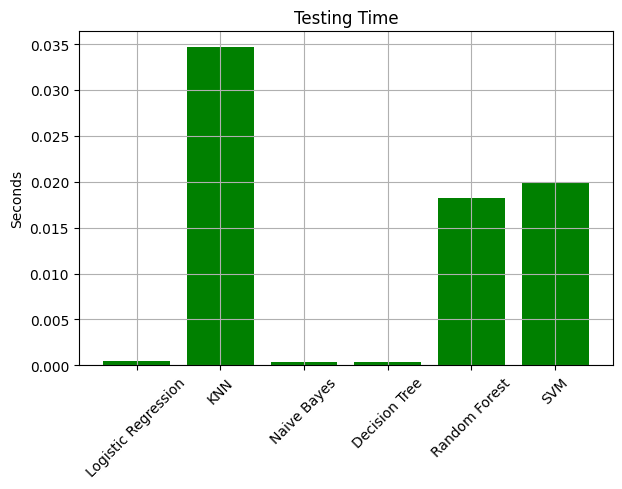

In [102]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
plt.bar(x, test_time, color='green')
plt.xticks(x, model_name, rotation=45)
plt.ylabel("Seconds")
plt.title("Testing Time")
plt.grid(True)
plt.tight_layout()
plt.show()

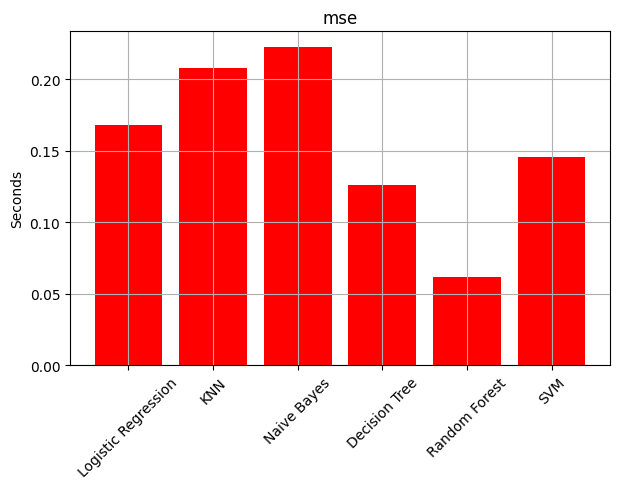

In [103]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
plt.bar(x, mse, color='red')
plt.xticks(x, model_name, rotation=45)
plt.ylabel("Seconds")
plt.title("mse")
plt.grid(True)
plt.tight_layout()
plt.show()

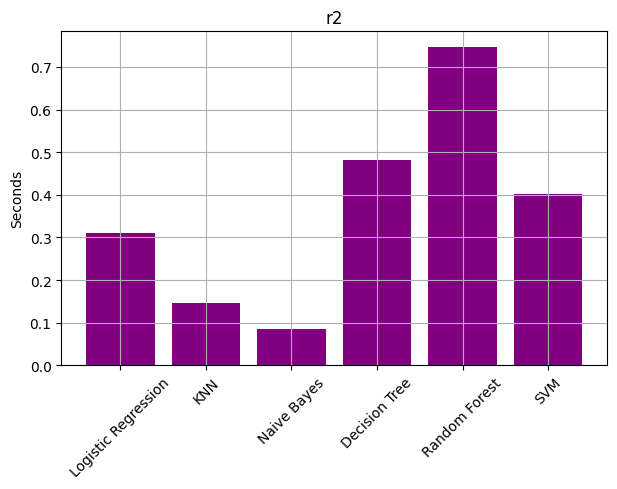

In [104]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
plt.bar(x, r2, color='purple')
plt.xticks(x, model_name, rotation=45)
plt.ylabel("Seconds")
plt.title("r2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
print(" Random Forest ")
for n in [50, 100, 150,200]:
    model = RandomForestClassifier(n_estimators=n, max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"n_estimators={n} so Accuracy: {acc:.4f}")

print(" Random Forest ")
for d in [5, 10, None]:
    model = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"max_depth={d} so Accuracy: {acc:.4f}")

print("desicion tree")
for d in [3, 5, 10, None]:
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"max_depth={d} so Accuracy: {acc:.4f}")


print("knn")
for k in [3, 5, 7]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"n_neighbors={k} so Accuracy: {acc:.4f}")

print("logistic regression")
for c in [0.1, 1, 10]:
    model = LogisticRegression(C=c, max_iter=1000)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"C={c} so Accuracy: {acc:.4f}")

print(" SVM ")
for c in [0.1, 1, 10]:
    model = SVC(C=c, kernel='rbf')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"C={c} so Accuracy: {acc:.4f}")

print(" SVM )")
for k in ['linear', 'rbf', 'poly']:
    model = SVC(C=1, kernel=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"kernel='{k}' so Accuracy: {acc:.4f}")

 Random Forest 
n_estimators=50 so Accuracy: 0.9259
n_estimators=100 so Accuracy: 0.9358
n_estimators=150 so Accuracy: 0.9333
n_estimators=200 so Accuracy: 0.9309
 Random Forest 
max_depth=5 so Accuracy: 0.8469
max_depth=10 so Accuracy: 0.9358
max_depth=None so Accuracy: 0.9358
desicion tree
max_depth=3 so Accuracy: 0.7877
max_depth=5 so Accuracy: 0.8815
max_depth=10 so Accuracy: 0.8864
max_depth=None so Accuracy: 0.8741
knn
n_neighbors=3 so Accuracy: 0.7951
n_neighbors=5 so Accuracy: 0.7728
n_neighbors=7 so Accuracy: 0.7926
logistic regression
C=0.1 so Accuracy: 0.8272
C=1 so Accuracy: 0.8321
C=10 so Accuracy: 0.8321
 SVM 
C=0.1 so Accuracy: 0.7778
C=1 so Accuracy: 0.8543
C=10 so Accuracy: 0.8494
 SVM )
kernel='linear' so Accuracy: 0.8222
kernel='rbf' so Accuracy: 0.8543
kernel='poly' so Accuracy: 0.8395


In [106]:
vote = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('knn', KNeighborsClassifier(n_neighbors=3)),
        ('dt', DecisionTreeClassifier(max_depth=5)),
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=10)),
        ('svm', SVC(C=1, kernel='rbf',probability=True))
    ],
    voting='soft'
)
vote.fit(X_train, y_train)
vote_preds = vote.predict(X_test)
print("\nVoting Classifier Accuracy:", accuracy_score(y_test, vote_preds))
print("R² Score:", r2_score(y_test, vote_preds))
print("MSE:", mean_squared_error(y_test, vote_preds))



Voting Classifier Accuracy: 0.9111111111111111
R² Score: 0.6344398756393541
MSE: 0.08888888888888889


In [107]:
#Voting is an ensemble machine learning technique used to improve prediction accuracy by combining the outputs of multiple different models (classifiers)
#Hard Voting (Majority Voting)
#Soft Voting (Probability Averaging)
#Stacking Classifier
#Use outputs from base models as inputs to a meta-model

In [108]:
stack = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True)),
        ('dt', DecisionTreeClassifier()),
        ('knn', KNeighborsClassifier()),
        ('nb', GaussianNB())
    ],
    final_estimator=LogisticRegression(),
    cv=3
)
stack.fit(X_train, y_train)
stack_preds = stack.predict(X_test)
print("\nStacking Classifier Accuracy:", accuracy_score(y_test, stack_preds))
print("R² Score:", r2_score(y_test, stack_preds))
print("MSE:", mean_squared_error(y_test, stack_preds))


Stacking Classifier Accuracy: 0.945679012345679
R² Score: 0.7766021462240498
MSE: 0.05432098765432099


In [109]:
model = RandomForestClassifier(n_estimators=100, max_depth=10)
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)

# Save Train Model


In [110]:
with open('RandomforestClassifier.pkl', 'wb') as file:
    pickle.dump(model, file)